## Exercício 4

## Letra a

A partir das densidades condicional e probabilidade a priori, desenvolveu-se os valores informados para a identificação do $g_{i}(x)$. Tendo em vista que a escolha da classe é dada por $\max _ { k } g _ { k } ( x )$, como estamos tratando de um caso com apenas duas Classes, é possível assumir que caso $g_{-1}(x) - g_{+1}(x) > 0$ devemos escolher a Classe $C_{-1}$ e caso contrário, $C_{+1}$. Foi feita uma representação das funções de discriminante como uma razão de logarítma entre as probabilidades. O código referente a essa análise está representado nos blocos a seguir.

In [1]:
from math import log, pi, exp
import csv
import numpy as np

import matplotlib.pyplot as plt

PCm1 = 0.3
PCp1 = 0.7

O código acima importa as bibliotecas utilizadas e inicializa os valores das probabilidades a priori para as Classes $C_{-1}$ e $C_{+1}$ respectivamente. A análise dos dados com verificação das funções discriminantes são feitas no bloco de código a seguir. Nela, todos os pontos observados são plotados em um gráfico, sendo que a Classe $C_{-1}$ será representada com circulos azuis e a Classe $C_{+1}$ será representada por sinais de soma (+) vermelhos. Além disso, é feita a verificação sobre a entrada sobre o classificador Bayesiano desenvolvido. Isso é feito pela verificação do $\max _ { k } g _ { k } ( x )$ entre as classes. A partir desse resultado, se compara com o \textit{label} obtido e verifica-se se a Classe escolhida foi correta. Esses resultados são somados para obter-se uma proporção de acerto/erro do classificador.

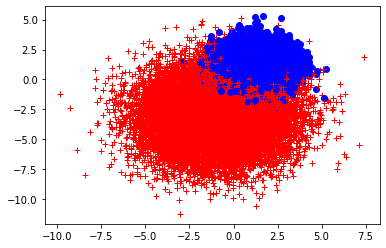

Porcentagem de acerto = 0.95


In [5]:
success = 0
total = 0
plt.figure()
with open('dados1.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        pXCp1 = -log(8*pi) - ((float(row[0])+1)**2 + (float(row[1])+3)**2)/8
        pXCm1 = -log(2*pi) - ((float(row[0])-1.2)**2 + (float(row[1])-1.2)**2)/2
        result = pXCm1 - pXCp1 + log(PCm1) - log(PCp1)
        if result > 0 and row[2] == '-1':
            success += 1
        elif result < 0 and row[2] == '1':
            success += 1
        total += 1
        if row[2] == '-1':
            plt.plot(float(row[0]), float(row[1]), 'bo')
        else:
            plt.plot(float(row[0]), float(row[1]), 'r+')
plt.show()
print('Porcentagem de acerto = {0:.2f}'.format(float(success/total)))

O resultado obtido se mostra muito bom, visto que apenas apresenta um erro de $\%$.

## Letra b

Com o plot obtido de todos os valores separados por suas respectivas classes, é possível estimar uma fronteira de decisão para as Classes, visto que elas se mostram agrupadas com um conjunto da mesma classe. Isso foi feito com a Identificação de erros que ocorreram na Classificação com módulo menor que 0,5. A fronteira de decisão se mostra muito próximo dos valores das amostras, porém o modelo ainda se mostra bom, visto o resultado obtido no item anterior.

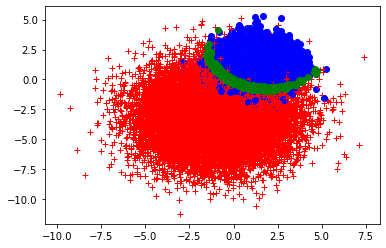

In [7]:
total = 0
plt.figure()
with open('dados1.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        if row[2] == '-1':
            plt.plot(float(row[0]), float(row[1]), 'bo')
        else:
            plt.plot(float(row[0]), float(row[1]), 'r+')
        pXCp1 = -log(8*pi) - ((float(row[0])+1)**2 + (float(row[1])+3)**2)/8
        pXCm1 = -log(2*pi) - ((float(row[0])-1.2)**2 + (float(row[1])-1.2)**2)/2
        result = pXCm1 - pXCp1 + log(PCm1) - log(PCp1)
        if result > 0 and row[2] == '-1':
            success += 1
        elif result < 0 and row[2] == '1':
            success += 1
        elif abs(result) < 0.5:
            plt.plot(float(row[0]), float(row[1]), 'go', zorder=100000)
        total += 1
plt.show()